## Normal Distribution
---

The p.d.f. of a <font color=red>normal distribution</font> is 

\begin{align*}
 & p(x|\mu,\sigma^2) = \frac1{\sqrt{2\pi\sigma^2}}
 \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right], \\
 & -\infty<x<\infty,\ -\infty<\mu<\infty,\ \sigma^2>0, \\
 &\mathrm{E}[X]=\mu,\quad \mathrm{Var}[X]=\sigma^2.
\end{align*}


In [1]:
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

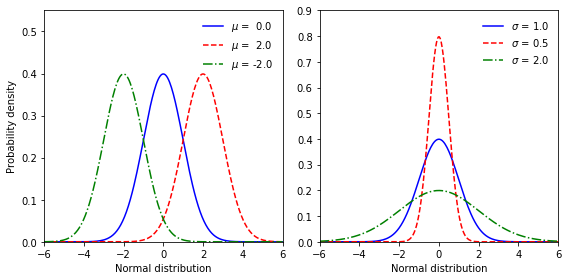

In [2]:
value_mu = np.array([0.0, 2.0, -2.0])
value_sigma = np.array([1.0, 0.5, 2.0])
styles = ['-', '--', '-.']
colors = ['b', 'r', 'g']
x = np.linspace(-6, 6, 250)
fig1, ax1 = plt.subplots(1, 2, sharex='row', num=1, figsize=(8, 4), facecolor='w')
ax1[0].set_xlim(-6, 6)
ax1[0].set_ylabel('Probability density')
for index in range(value_mu.size):
    mu_i = value_mu[index]
    plot_label = '$\\mu$ = {0:< 3.1f}'.format(mu_i)
    ax1[0].plot(x, st.norm.pdf(x, loc=mu_i), color=colors[index], linestyle=styles[index], label=plot_label)
ax1[0].set_ylim(0, 0.55)
ax1[0].set_xlabel('Normal distribution')
ax1[0].legend(loc='upper right', frameon=False)
for index in range(value_mu.size):
    sigma_i = value_sigma[index]
    plot_label = '$\\sigma$ = {0:<3.1f}'.format(sigma_i)
    ax1[1].plot(x, st.norm.pdf(x, scale=sigma_i), color=colors[index], linestyle=styles[index], label=plot_label)
ax1[1].set_ylim(0, 0.9)
ax1[1].set_xlabel('Normal distribution')
ax1[1].legend(loc='upper right', frameon=False)
plt.tight_layout()
# plt.savefig('ms_fig_gaussian_distribution.png', dpi=300)
plt.show()

## Inverse Gamma Distribution and Student's $t$-distribution
---

The p.d.f. of an <font color=red>inverse gamma distribution</font> is

\begin{equation*}
 p(x|\alpha,\beta)
 = \frac{\beta^\alpha}{\Gamma(\alpha)}
 x^{-(\alpha+1)}\exp\left(-\frac{\beta}{x}\right),\ x > 0,\ \alpha > 0,\ \beta > 0.
\end{equation*}

The p.d.f. of a (Student's) <font color=red>$t$-distribution</font> is 

\begin{align*}
 & p(x|\nu,\mu,\sigma^2) = \frac{\Gamma\left(\frac{\nu+1}2\right)}{\Gamma\left(\frac{\nu}2\right)\sqrt{\pi\nu\sigma^2}}
 \left[1 + \frac{(x-\mu)^2}{\nu\sigma^2}\right]^{-\frac{\nu+1}2}, \\
 & -\infty<x<\infty,\ \nu>0,\ -\infty<\mu<\infty,\ \sigma^2>0, \\
 & \mathrm{E}[X] = \mu,\ (\nu > 1),\ \mathrm{Var}[X] = \frac{\nu}{\nu-2}\sigma^2,\ (\nu>2).
\end{align*}


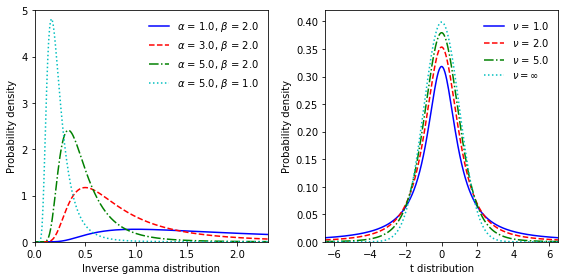

In [3]:
value_a = np.array([1.0, 3.0, 5.0, 5.0])
value_b = np.array([2.0, 2.0, 2.0, 1.0])
value_n = np.array([1.0, 2.0, 5.0])
styles = ['-', '--', '-.', ':']
colors = ['b', 'r', 'g', 'c']
fig2, ax2 = plt.subplots(1, 2, num=2, figsize=(8, 4), facecolor='w')
x1 = np.linspace(0, 2.3, 250)
for index in range(value_a.size):
    a_i = value_a[index]
    b_i = value_b[index]
    plot_label = '$\\alpha$ = {0:3.1f}, $\\beta$ = {1:3.1f}'.format(a_i, b_i)
    ax2[0].plot(x1, st.invgamma.pdf(x1, a_i, scale=b_i), color=colors[index], linestyle=styles[index], label=plot_label)
ax2[0].set_xlim(0, 2.3)
ax2[0].set_ylim(0, 5)
ax2[0].set_xlabel('Inverse gamma distribution')
ax2[0].set_ylabel('Probability density')
ax2[0].legend(loc='upper right', frameon=False)
x2 = np.linspace(-6.5, 6.5, 250)
for index in range(value_n.size):
    n_i = value_n[index]
    plot_label = '$\\nu$ = {0:3.1f}'.format(n_i)
    ax2[1].plot(x2, st.t.pdf(x2, n_i), color=colors[index], linestyle=styles[index], label=plot_label)
ax2[1].plot(x2, st.norm.pdf(x2), color=colors[-1], linestyle=styles[-1], label='$\\nu = \\infty$')
ax2[1].set_xlim(-6.5, 6.5)
ax2[1].set_ylim(0, 0.42)
ax2[1].set_xlabel('t distribution')
ax2[1].set_ylabel('Probability density')
ax2[1].legend(loc='upper right', frameon=False)
plt.tight_layout()
# plt.savefig('ms_fig_invgamma_t.png', dpi=300)
plt.show()

## Normal-Inverse-Gamma Prior
---

The natural conjugate prior for $(\mu,\sigma^2)$ is

\begin{equation*}
 \mu|\sigma^2 \sim \mathrm{Normal}\left(\mu_0,\frac{\sigma^2}{n_0}\right), \ 
 \sigma^2 \sim \mathrm{Inv. Gamma}\left(\frac{\nu_0}2,\frac{\lambda_0}2\right).
\end{equation*}

The joint p.d.f. of the prior distribution is given by

\begin{align*}
 p(\mu,\sigma^2) &= p(\mu|\sigma^2)p(\sigma^2), \\
 p(\mu|\sigma^2)
 &= \sqrt{\frac{n_0}{2\sigma^2}}\exp\left[-\frac{n_0(\mu-\mu_0)^2}{2\sigma^2}\right] , \\
 p(\sigma^2)
 &= \frac{\left(\frac{\lambda_0}2\right)^{\frac{\nu_0}2}}{\Gamma\left(\frac{\nu_0}2\right)}(\sigma^2)^{-\left(\frac{\nu_0}2+1\right)}\exp\left(-\frac{\lambda_0}{2\sigma^2}\right).
\end{align*}

The joint distribution of $(\mu, \sigma^2)$ is often called the normal-inverse-gamma distribution.


## Likelihood
---

The likelihood of $(\mu, \sigma^2)$ is
\begin{align*}
 p(D|\mu,\sigma^2)
 &= \prod_{i=1}^n p(x_i|\mu,\sigma^2) \\
 &= \prod_{i=1}^n \frac1{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x_i-\mu)^2}{2\sigma^2}\right] \\
 &= (2\pi\sigma^2)^{-\frac{n}2}\exp\left[-\frac{\sum_{i=1}^n(x_i-\mu)^2}{2\sigma^2}\right].
\end{align*}

Since

\begin{align*}
 \sum_{i=1}^n(x_i-\mu)^2
 &= \sum_{i=1}^n(x_i-\bar x+\bar x-\mu)^2 \\
 &= \sum_{i=1}^n\left\{(x_i-\bar x)^2 + 2(x_i-\bar x)(\bar x - \mu) + (\bar x - \mu)^2\right\} \\
 &= \sum_{i=1}^n(x_i-\bar x)^2 + n(\bar x - \mu)^2,
\end{align*}

the likelihood is rewritten as

\begin{equation*}
 p(D|\mu,\sigma^2)
 \propto (\sigma^2)^{-\frac{n}2}\exp\left[-\frac{\sum_{i=1}^n(x_i-\bar x)^2 + n(\bar x - \mu)^2}{2\sigma^2}\right].
\end{equation*}


## Joint Posterior Distribution
---

Applying Bayes' theorem, we have

\begin{align*}
 & p(\mu,\sigma^2|D) \nonumber \\
 &\propto p(D|\mu,\sigma^2)p(\mu|\sigma^2)p(\sigma^2) \\
 &\propto (\sigma^2)^{-\frac{n}2}\exp\left[-\frac{\sum_{i=1}^n(x_i-\bar x)^2 + n(\bar x - \mu)^2}{2\sigma^2}\right]
 \nonumber \\
 &\quad\times (\sigma^2)^{-\frac12}\exp\left[-\frac{n_0(\mu-\mu_0)^2}{2\sigma^2}\right]
 \times (\sigma^2)^{-\left(\frac{\nu_0}2+1\right)}\exp\left[-\frac{\lambda_0}{2\sigma^2}\right] \\
 &\propto (\sigma^2)^{-\frac{n+\nu_0+3}2}\exp\Bigg[-\frac1{2\sigma^2}\bigg\{\sum_{i=1}^n(x_i-\bar x)^2
 + n(\bar x - \mu)^2  \nonumber\\
 &\qquad\qquad\qquad\qquad\qquad\qquad\qquad + n_0(\mu-\mu_0)^2 + \lambda_0\bigg\}\Bigg].
\end{align*}

By completing the square, we have

\begin{align*}
 & n(\bar x - \mu)^2 + n_0(\mu-\mu_0)^2 \\
 &= (n+n_0)\mu^2 - 2(n\bar x + n_0\mu_0)\mu + n\bar x^2 + n_0\mu_0^2 \\
 &= (n+n_0)\left(\mu - \frac{n\bar x + n_0\mu_0}{n+n_0}\right)^2 +
 \frac{nn_0}{n+n_0}(\mu_0-\bar x)^2.
\end{align*}

Therefore the joint posterior distribution of $(\mu, \sigma^2)$ is derived as 

\begin{align*}
 p(\mu,\sigma^2|D)
 &\propto (\sigma^2)^{-\frac12}\exp\left[-\frac{n_*(\mu-\mu_*)^2}{2\sigma^2}\right] \\
 &\quad\times (\sigma^2)^{-\left(\frac{\nu_*}2+1\right)}\exp\left(-\frac{\lambda_*}{2\sigma^2}\right),
\end{align*}

where

\begin{align*}
 \mu_* &= \frac{n\bar x + n_0\mu_0}{n + n_0},\quad n_* = n + n_0,\quad \nu_* = n + \nu_0, \\
 \lambda_* &= \sum_{i=1}^n(x_i-\bar x)^2 + \frac{nn_0}{n+n_0}(\mu_0-\bar x)^2 + \lambda_0.
\end{align*}

This is also a normal-inverse-gamma distribution.

\begin{equation*}
 \mu|\sigma^2,D \sim \mathrm{Normal}\left(\mu_*,\frac{\sigma^2}{n_*}\right),\quad
 \sigma^2|D \sim \mathrm{Inv. Gamma}\left(\frac{\nu_*}2,\frac{\lambda_*}2\right),
\end{equation*}

## Marginal Posterior Distributions
---

The marginal posterior distribution of $\mu$ is a Student's $t$-distribution:

\begin{equation*}
 \mu|D\sim\mathrm{t}\left(\nu_*,\mu_*,\tau_*^2\right),\quad
 \tau_*^2 = \frac{\lambda_*}{\nu_*n_*}.
\end{equation*}

The marginal posterior distribution of $\sigma^2$ is an inverse gamma distribution:

\begin{equation*}
 \sigma^2|D \sim \mathrm{Inv. Gamma}\left(\frac{\nu_*}2,\frac{\lambda_*}2\right)
\end{equation*}


In [4]:
def invgamma_hpdi(ci0, alpha, beta, prob):
    def hpdi_conditions(v, a, b, p):
        eq1 = st.invgamma.cdf(v[1], a, scale=b) - st.invgamma.cdf(v[0], a, scale=b) - p
        eq2 = st.invgamma.pdf(v[1], a, scale=b) - st.invgamma.pdf(v[0], a, scale=b)
        return np.hstack((eq1, eq2))
    return opt.root(hpdi_conditions, ci0, args=(alpha, beta, prob)).x

In [5]:
def gaussian_stats(data, mu0, n0, nu0, lam0, prob):
    n = data.size
    mean_data = data.mean()
    ssd_data = n * data.var()
    n_star = n + n0
    mu_star = (n * mean_data + n0 * mu0) / n_star
    nu_star = n + nu0
    lam_star = ssd_data + n * n0 / n_star * (mu0 - mean_data)**2 + lam0
    tau_star = np.sqrt(lam_star / nu_star / n_star)
    sd_mu = st.t.std(nu_star, loc=mu_star, scale=tau_star)
    ci_mu = st.t.interval(prob, nu_star, loc=mu_star, scale=tau_star)
    mean_sigma2 = st.invgamma.mean(0.5*nu_star, scale=0.5*lam_star)
    mode_sigma2 = lam_star / (nu_star + 2.0)
    median_sigma2 = st.invgamma.median(0.5*nu_star, scale=0.5*lam_star)
    sd_sigma2 = st.invgamma.std(0.5*nu_star, scale=0.5*lam_star)
    ci_sigma2 = st.invgamma.interval(prob, 0.5*nu_star, scale=0.5*lam_star)
    hpdi_sigma2 = invgamma_hpdi(ci_sigma2, 0.5*nu_star, 0.5*lam_star, prob)
    stats_mu = np.hstack((mu_star, mu_star, mu_star, sd_mu, ci_mu, ci_mu))
    stats_sigma2 = np.hstack((mean_sigma2, median_sigma2, mode_sigma2,
                              sd_sigma2, ci_sigma2, hpdi_sigma2))
    stats = np.vstack((stats_mu, stats_sigma2))
    stats_string = ['mean', 'median', 'mode', 'sd', 'ci (lower)', 'ci (upper)', 'hpdi (lower)', 'hpdi (upper)']
    param_string = ['$\\mu$', '$\\sigma^2$']
    results = pd.DataFrame(stats, index=param_string, columns=stats_string)
    return results, mu_star, tau_star, nu_star, lam_star

In [6]:
mu = 1.0
sigma = 2.0
n = 50
np.random.seed(99)
data = st.norm.rvs(loc=mu, scale=sigma, size=n)
mu0 = 0.0
n0 = 0.2
nu0 = 5.0
lam0 = 7.0
tau0 = np.sqrt(lam0 / nu0 / n0)
prob = 0.95
results, mu_star, tau_star, nu_star, lam_star = gaussian_stats(data, mu0, n0, nu0, lam0, prob)
display(results)

,mean,median,mode,sd,ci (lower),ci (upper),hpdi (lower),hpdi (upper)
$\mu$,1.004282,1.004282,1.004282,0.271394,0.470378,1.538187,0.470378,1.538187
$\sigma^2$,3.697454,3.606622,3.437984,0.732205,2.532488,5.383935,2.402354,5.165040


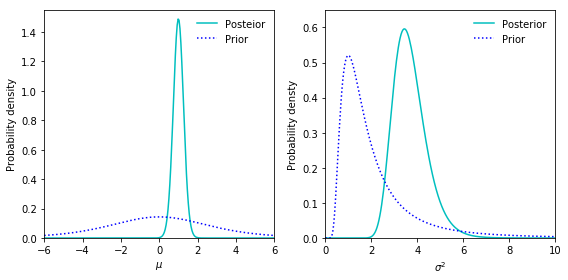

In [7]:
fig3, ax3 = plt.subplots(1, 2, num=3, figsize=(8, 4), facecolor='w')
x1 = np.linspace(-6, 6, 250)
ax3[0].plot(x1, st.t.pdf(x1, nu_star, loc=mu_star, scale=tau_star), 'c-', label='Posteior')
ax3[0].plot(x1, st.t.pdf(x1, nu0, loc=mu0, scale=tau0), 'b:', label='Prior')
ax3[0].set_xlim(-6, 6)
ax3[0].set_ylim(0, 1.55)
ax3[0].set_xlabel('$\\mu$')
ax3[0].set_ylabel('Probability density')
ax3[0].legend(loc='best', frameon=False)
x2 = np.linspace(0, 10, 250)
ax3[1].plot(x2, st.invgamma.pdf(x2, 0.5*nu_star, scale=0.5*lam_star), 'c-', label='Posterior')
ax3[1].plot(x2, st.invgamma.pdf(x2, 0.5*nu0, scale=0.5*lam0), 'b:', label='Prior')
ax3[1].set_xlim(0, 10)
ax3[1].set_ylim(0, 0.65)
ax3[1].set_xlabel('$\\sigma^2$')
ax3[1].set_ylabel('Probability densty')
ax3[1].legend(loc='best', frameon=False)
plt.tight_layout()
# plt.savefig('ms_fig_gaussian_posterior.png', dpi=300)
plt.show()